In [299]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [300]:
deep_tweet_train = pd.read_csv("train.csv")
deep_tweet_test = pd.read_csv("test.csv")

In [301]:
deep_tweet_train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [302]:
deep_tweet_test.head()

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...


In [303]:
deep_tweet_train.shape

(6525, 3)

In [304]:
deep_tweet_test.shape

(2610, 2)

In [305]:
deep_tweet_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [306]:
deep_tweet_train["Label"].value_counts()

Label
Sports      3325
Politics    3200
Name: count, dtype: int64

<Axes: ylabel='count'>

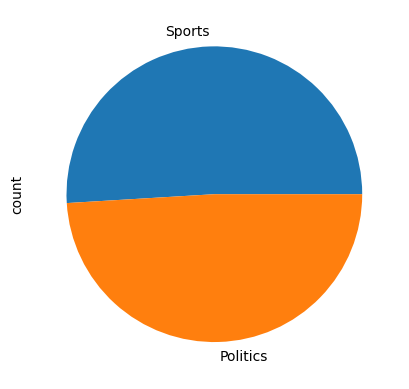

In [307]:
deep_tweet_train["Label"].value_counts().plot.pie()

Cleaning Data 

In [308]:
import re
import string        #Text Cleaning

In [309]:
def clean_text(text):
    
    text = str(text).lower()                                          #Converts text to lowercase

    text = re.sub('\d+', '', text)                                    #Removes numbers


    text = re.sub('\[.*?\]', '', text)                                #Removes HTML tags


    text = re.sub('https?://\S+|www\.\S+', '', text)                  #Removes URLs


    text = re.sub('[^\w\s]', '', text)                                #Removes emojis and symbols


    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)   #Removes punctuation
    
    return text

Copy and Save Cleaned Data

In [310]:
tweet_copy = deep_tweet_train.copy() 

In [311]:
tweet_copy["cleaned_text"] = tweet_copy["TweetText"].apply(clean_text)

Drop the Original TweetText 

In [312]:
tweet_copy.drop("TweetText", axis=1, inplace=True)

Create new cleaned DATA

In [313]:
tweet_copy.to_csv("cleaned_train.csv", index=False)

In [314]:
tweet_copy.head()

,TweetId,Label,cleaned_text
0,304271250237304833,Politics,seckerry the value of the statedept and usaid ...
1,304834304222064640,Politics,rraina i fear so
2,303568995880144898,Sports,watch video highlights of the wwc final betwee...
3,304366580664528896,Sports,rt chelscanlan at nitro circus at albertpark ...
4,296770931098009601,Sports,cricketfox always a good thing thanks for the ...


In [315]:
tweets = pd.read_csv("cleaned_train.csv")

In [316]:
from sklearn.ensemble import RandomForestClassifier        #Initialize and training
from sklearn.feature_extraction.text import TfidfVectorizer  #convert text to vector  [Feature Extraction]
from sklearn.model_selection import train_test_split        #split Train / Test

In [317]:
X = tweets['cleaned_text']  
y = tweets['Label'] 


vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X)

In [318]:
#Split the data into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y, test_size=0.2, random_state=82)

In [319]:
model = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

Making Prediction on Test Set

In [320]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [321]:
y_pred = model.predict(X_train)

In [322]:
print(f"Classification Report:\n{classification_report(y_train, y_pred)}")
print(f"train: {model.score(X_train, y_train):.2f}")
print(f"test: {model.score(X_test, y_test):.2f}")

Classification Report:
              precision    recall  f1-score   support

    Politics       0.93      0.79      0.85      2570
      Sports       0.82      0.95      0.88      2650

    accuracy                           0.87      5220
   macro avg       0.88      0.87      0.87      5220
weighted avg       0.88      0.87      0.87      5220

train: 0.87
test: 0.86


C:\Users\marwan\AppData\Local\Temp\ipykernel_11860\3695984888.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_cmap = plt.cm.get_cmap('cividis')


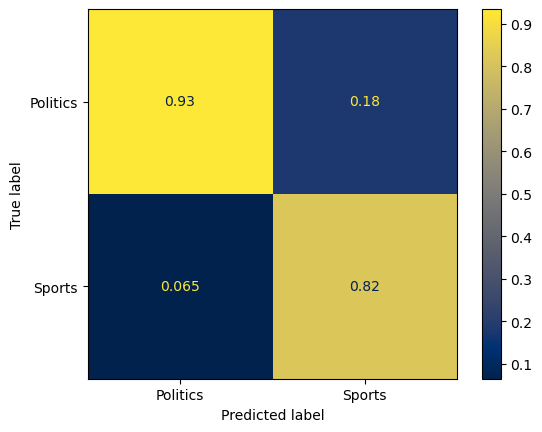

In [323]:
# Display confusion matrix
disp= ConfusionMatrixDisplay(
    confusion_matrix(y_train, y_pred, normalize='pred'),
    display_labels=["Politics", "Sports"]
)

custom_cmap = plt.cm.get_cmap('cividis')
disp.plot(cmap=custom_cmap)

plt.show()

In [325]:
report = classification_report(y_test, y_pred, target_names=['Sports', 'Politics'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1305, 5220]